<a href="https://colab.research.google.com/github/AbhienayaSri9509/SRIP_2026_IITGN_AI-FOR-SUSTAINABILITY/blob/main/SRIP_2026_AI_for_Sustainability_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install geopandas rasterio shapely geemap torch torchvision seaborn scikit-learn

In [2]:
!pip install geopandas rasterio shapely geemap torch torchvision seaborn scikit-learn

In [3]:
!apt install gdal-bin python3-gdal
!pip install gdal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.8.4+dfsg-1~jammy0).
python3-gdal is already the newest version (3.8.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


 GeoJSON files loaded
NCR CRS: EPSG:4326
 Raster loaded
Raster CRS: EPSG:4326
 CRS matched
 Raster clipped


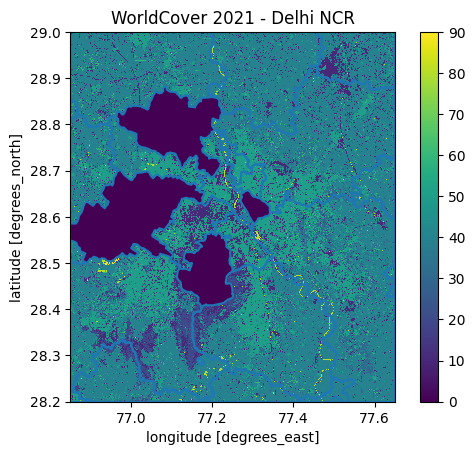

 Everything executed successfully!


In [1]:

# Install Required Libraries

!pip -q install geopandas rasterio rioxarray shapely matplotlib


#  Import Libraries
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt

#  Load GeoJSON Files

delhi_ncr = gpd.read_file("delhi_ncr_region (1).geojson")
airshed = gpd.read_file("delhi_airshed.geojson")

print(" GeoJSON files loaded")
print("NCR CRS:", delhi_ncr.crs)


#  Load Raster (WorldCover)
raster = rioxarray.open_rasterio("worldcover_bbox_delhi_ncr_2021.tif")

print(" Raster loaded")
print("Raster CRS:", raster.rio.crs)

#  Make CRS Same

delhi_ncr = delhi_ncr.to_crs(raster.rio.crs)
airshed = airshed.to_crs(raster.rio.crs)

print(" CRS matched")

#  Clip Raster to NCR Boundary

clipped = raster.rio.clip(delhi_ncr.geometry, delhi_ncr.crs, drop=True)

print(" Raster clipped")

#  Plot Everything

plt.figure()
clipped.plot()
delhi_ncr.boundary.plot(ax=plt.gca())
airshed.boundary.plot(ax=plt.gca())
plt.title("WorldCover 2021 - Delhi NCR")
plt.show()

print(" Everything executed successfully!")